In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_excel("data/transport starter kits/TSDK_ALL.xlsx",sheet_name="Data")
data_vehicle_stock = pd.read_excel("data/transport starter kits/TSDK_ALL_VehicleStock_noMC.xlsx",sheet_name="Data")
vehicle_stock = data_vehicle_stock.loc[(data_vehicle_stock.Variable=="Vehicle stock") & (data_vehicle_stock["Sub-type"]=="All no MC")]
vehicle_stock.head()

,Continent,Country name,ISO Alpha-2 code,ISO Alpha-3 code,Numeric country code,Variable,Type,Sub-type,Fuel,Destination,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa,Angola,AO,AGO,24,Vehicle stock,Road,All no MC,All,All,...,770000.0,800000.0,840000.0,880000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,Burundi,BI,BDI,108,Vehicle stock,Road,All no MC,All,All,...,NaN,NaN,NaN,30325.0,34266.0,48442.0,48978.0,NaN,NaN,NaN
7,Africa,Benin,BJ,BEN,204,Vehicle stock,Road,All no MC,All,All,...,NaN,NaN,NaN,37962.5,37075.0,24357.0,24106.5,24295.0,NaN,NaN
25,Africa,Burkina Faso,BF,BFA,854,Vehicle stock,Road,All no MC,All,All,...,NaN,NaN,NaN,299085.0,324185.0,352657.0,382905.0,415257.0,447303.0,NaN
33,South America,Brazil,BR,BRA,76,Vehicle stock,Road,All no MC,All,All,...,NaN,NaN,NaN,64164723.0,66215856.0,68456385.0,71021475.0,73807436.0,75863573.0,NaN


Text(0, 0.5, 'vehicle ownership per 1000 capita')

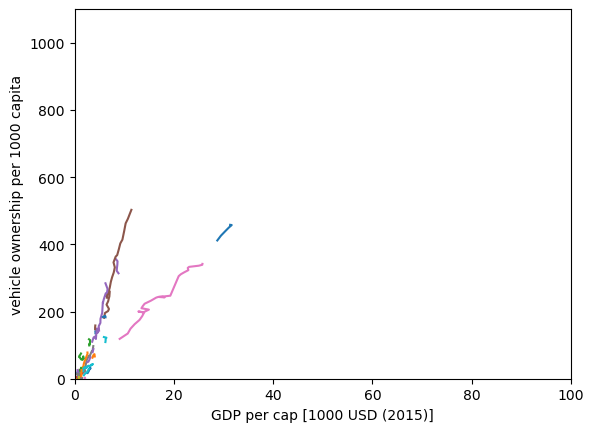

In [2]:
import numpy as np

fig,ax = plt.subplots()

for i,row in vehicle_stock.iterrows():


    #print(row["Country name"])
    gdp = data.loc[(data.Variable=="GDP") & (data["Type"]=="All") & (data["Country name"]==row["Country name"])].iloc[0,-32:].values
    pop = data.loc[(data.Variable=="Population") & (data["Type"]=="All") & (data["Country name"]==row["Country name"])].iloc[0,-32:].values
    v_stock = row.values[-32:]

    # print(i)
    # print("max vehicles: ",np.nanmax(row.values[-32:]/(pop*1e3)))
    # print("max gdp pc: ",max(gdp/1e3/pop))
    if row["Country name"] =="Taiwan Province of China":
        gdp = gdp*1e3
        v_stock = row.values[-32:]
        v_stock[-1]=np.nan


    ax.plot(gdp/1e3/pop,v_stock/(pop*1e3))
    #ax.text(gdp[-5]/1e3/pop[-5], v_stock[-5]/(pop[-5]*1e3), f'{row["Country name"]}')
    #print(gdp[-1],pop[-1],v_stock[-1])

#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlim([0,100])
ax.set_ylim([0,1100])
ax.set_xlabel("GDP per cap [1000 USD (2015)]")
ax.set_ylabel("vehicle ownership per 1000 capita")